# Portfolio Construction - PSX

## Contents
1. Importing Libraries
2. Importing Data
3. Data Pre-processing
4. Analysis

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Importing Data

- The data is stored as separate csv files (for separate stocks) in one folder.
- We import one sample file to take a look 

In [2]:
sample = pd.read_csv('C:/Users/humaa/Documents/Portfolio Construction/Data Download - Kaggle/PSX_100_index_trading_data_2014-2024/PSX 100 index/ABL.csv')

In [3]:
# Brief look at the sample data
sample.head()

,Date,trading_open,trading_high,trading_low,trading_close,trading_vol,trading_change
0,31-05-2024,99.90,99.90,98.1,98.54,5411,0.25
1,30-05-2024,99.20,99.20,98.0,98.29,47206,-1.11
2,29-05-2024,99.47,99.47,98.0,99.40,86683,0.89
3,27-05-2024,98.90,99.25,98.1,98.51,47538,-0.28
4,24-05-2024,98.00,99.50,98.0,98.79,53000,0.38


- Since there are numerous files, we need to find a way to import and store them together

In [4]:
path = 'C:/Users/humaa/Documents/Portfolio Construction/Data Download - Kaggle/PSX_100_index_trading_data_2014-2024/PSX 100 index'
import glob
files = glob.glob(path+'/*.csv')

import os
prices = pd.DataFrame()
for f in files:
    x = pd.read_csv(f)
    x['Name']=os.path.basename(f)[:-4]
    prices = pd.concat([prices,x])

In [5]:
# Take a look at the prices data
prices.head()

,Date,trading_open,trading_high,trading_low,trading_close,trading_vol,trading_change,Name
0,31-05-2024,99.90,99.90,98.1,98.54,5411,0.25,ABL
1,30-05-2024,99.20,99.20,98.0,98.29,47206,-1.11,ABL
2,29-05-2024,99.47,99.47,98.0,99.40,86683,0.89,ABL
3,27-05-2024,98.90,99.25,98.1,98.51,47538,-0.28,ABL
4,24-05-2024,98.00,99.50,98.0,98.79,53000,0.38,ABL


In [6]:
prices.describe()

,trading_open,trading_high,trading_low,trading_close,trading_vol,trading_change
count,235573.000000,235573.000000,235573.000000,235573.000000,2.355730e+05,235573.000000
mean,350.702129,355.002479,347.050932,351.182652,1.520576e+06,0.256015
std,1291.312130,1304.466358,1282.525063,1295.080151,5.101625e+06,38.438953
min,1.240000,1.330000,1.230000,1.310000,0.000000e+00,-1800.000000
25%,30.800000,31.250000,30.300000,30.780000,2.170000e+04,-0.820000
50%,81.010000,82.350000,80.000000,81.040000,2.268000e+05,-0.010000
75%,225.000000,228.140000,221.100000,224.640000,1.139000e+06,0.840000
max,26000.000000,26000.000000,26000.000000,26000.000000,4.811199e+08,1800.000000


In [7]:
prices.info

<bound method DataFrame.info of             Date  trading_open  trading_high  trading_low  trading_close  \
0     31-05-2024         99.90         99.90        98.10          98.54   
1     30-05-2024         99.20         99.20        98.00          98.29   
2     29-05-2024         99.47         99.47        98.00          99.40   
3     27-05-2024         98.90         99.25        98.10          98.51   
4     24-05-2024         98.00         99.50        98.00          98.79   
...          ...           ...           ...          ...            ...   
2358  07-01-2014          5.80          6.53         5.80           6.53   
2359  06-01-2014          5.74          5.75         5.42           5.53   
2360  03-01-2014          5.90          5.90         5.38           5.48   
2361  02-01-2014          6.42          6.42         5.76           5.99   
2362  01-01-2014          5.59          6.24         5.50           6.24   

      trading_vol  trading_change  Name  
0            

## 3. Data Pre-processing

- The data is stacked vertically. We want to change that. We are only interested in the closing price of each stock and it is better to have the columns to represent the closing prices for each stock.
- We can use the .pivot() method

- The operation below returns an error, because the 'Date' column contains duplicate entries of 'Name' for the same date. We remove these dupllicates.

``` prices.pivot(columns='Name',values='trading_close',index='Date') ```


In [8]:
# Checking the number of duplicates
prices_no_dup = prices.loc[:,['Date','Name']].drop_duplicates()
prices.shape[0] - prices_no_dup.shape[0]

189

- You want to select only those rows where the 189 duplicates don't exist
- Try to reverse the boolean you get from duplicated()

In [9]:
prices.loc[:,['Date','Name']].duplicated().sum()


189

In [10]:
~prices.loc[:,['Date','Name']].duplicated()

0       True
1       True
2       True
3       True
4       True
        ... 
2358    True
2359    True
2360    True
2361    True
2362    True
Length: 235573, dtype: bool

- This expression ~sample_a.loc[:,['Date','Name']].duplicated() gives you true in those indices where there are no duplicates
- You use these indices to subset from the original sample_a

In [11]:
prices_uni = prices[~prices.loc[:,['Date','Name']].duplicated().values]

- Check if it removed all the unwanted rows

In [12]:
prices.shape[0] - prices_uni.shape[0]

189

In [13]:
prices_cl = prices_uni.pivot(columns='Name',values='trading_close',index='Date')

<p style="font-family: Arial; font-size:1.4em;color:cyan;"> Success :) </p>



In [14]:
prices_cl.head()

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
Date,,,,,,,,,,,,,,,,,,,,,
01-01-2014,90.00,396.93,NaN,38.46,13.99,419.53,267.94,169.92,NaN,24.84,...,NaN,525.86,NaN,25.41,144.90,9.30,133.01,NaN,NaN,6.24
01-01-2015,113.55,700.84,NaN,50.60,23.22,443.79,578.21,151.39,29.23,31.28,...,38.25,NaN,NaN,48.07,275.48,15.01,174.98,NaN,NaN,4.70
01-01-2016,95.41,635.00,NaN,57.37,21.76,415.43,462.46,174.23,33.36,26.63,...,32.50,NaN,62.7,69.93,262.89,35.16,155.86,9.89,NaN,3.00
01-01-2018,NaN,668.02,NaN,52.00,19.97,437.23,525.05,191.85,29.32,39.53,...,29.00,787.50,75.0,95.12,510.87,30.76,190.06,16.02,NaN,4.15
01-01-2019,107.39,614.08,85.69,NaN,23.98,444.27,524.77,146.29,67.17,42.61,...,25.01,NaN,108.7,91.54,448.27,23.41,128.65,26.99,NaN,2.93


## 4. Analysis

- Computing return from prices by using the percentage change method

In [15]:
returns = prices_cl.pct_change()

In [16]:
returns.head()

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
Date,,,,,,,,,,,,,,,,,,,,,
01-01-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-01-2015,0.261667,0.765651,NaN,0.315653,0.659757,0.057827,1.157983,-0.109051,NaN,0.259259,...,NaN,0.000000,NaN,0.891775,0.901173,0.613978,0.315540,NaN,NaN,-0.246795
01-01-2016,-0.159753,-0.093944,NaN,0.133794,-0.062877,-0.063904,-0.200187,0.150869,0.141293,-0.148657,...,-0.150327,0.000000,NaN,0.454753,-0.045702,1.342438,-0.109270,NaN,NaN,-0.361702
01-01-2018,0.000000,0.052000,NaN,-0.093603,-0.082261,0.052476,0.135341,0.101131,-0.121103,0.484416,...,-0.107692,0.497547,0.196172,0.360217,0.943284,-0.125142,0.219428,0.619818,NaN,0.383333
01-01-2019,0.125563,-0.080746,NaN,0.000000,0.200801,0.016101,-0.000533,-0.237477,1.290928,0.077916,...,-0.137586,0.000000,0.449333,-0.037637,-0.122536,-0.238947,-0.323108,0.684769,NaN,-0.293976


In [17]:
# Formatting the index to datetime
returns.index = pd.to_datetime(returns.index, format = '%d-%m-%Y')

In [18]:
# This helps in subsetting by year/month and makes the plots nicer
returns.loc['2024']

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,-0.000476,-0.380611,-0.364969,-0.126625,0.059804,0.182775,-0.124000,0.891414,-0.195203,0.370092,...,0.254172,-0.251060,0.070788,0.185189,-0.346583,-0.050810,0.418392,-0.229305,0.531034,-0.119306
2024-02-01,0.294474,0.072257,0.156656,0.321101,0.182453,0.314561,0.010956,0.914119,-0.212079,0.641691,...,0.010053,1.462900,-0.132860,0.578128,0.593247,-0.374472,0.792751,0.435345,0.000000,-0.009259
2024-03-01,0.327273,0.235354,0.344614,0.254502,0.266301,0.319493,0.018805,1.154409,-0.132937,0.879987,...,0.067778,1.834081,-0.144514,0.685956,0.578161,-0.360214,0.723848,0.797192,0.000000,0.363014
2024-04-01,0.014078,-0.315823,-0.162530,0.015606,0.068839,0.237419,-0.317497,1.955542,-0.411951,0.498715,...,-0.082380,0.211688,-0.006020,-0.166170,-0.048457,-0.132898,0.293352,-0.123596,0.000000,-0.456869
2024-01-02,0.320312,-0.011096,0.094302,0.268776,0.231641,0.318736,0.117153,1.197207,-0.116014,0.558645,...,0.052174,0.771961,-0.079952,0.516163,0.527202,-0.223134,0.762649,0.836389,-0.075000,0.080429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-30,0.320891,0.170376,0.180843,0.335005,0.137412,0.325488,-0.272117,0.787038,-0.216609,0.635058,...,0.029602,1.526038,-0.131688,0.587961,0.647500,-0.372283,0.827296,0.455072,1.983871,0.015432
2024-04-30,0.431670,-0.254689,-0.283784,-0.105810,0.161372,0.170658,-0.306079,0.795663,-0.141616,1.037063,...,0.194207,0.114273,-0.086274,0.299952,-0.138921,-0.620389,0.534348,-0.186749,1.173913,-0.020173
2024-05-30,0.467015,0.730110,0.635473,0.505662,0.549404,0.341041,-0.228555,1.293150,0.116303,1.146164,...,0.031974,2.801479,0.030794,0.543075,1.470291,-0.354453,0.930821,1.079563,1.238612,0.150327


In [19]:
returns.loc['2024']['APL']

Date
2024-01-01    0.182775
2024-02-01    0.314561
2024-03-01    0.319493
2024-04-01    0.237419
2024-01-02    0.318736
                ...   
2024-01-30    0.325488
2024-04-30    0.170658
2024-05-30    0.341041
2024-01-31    0.294011
2024-05-31    0.355703
Name: APL, Length: 102, dtype: float64

- Visualising a sample

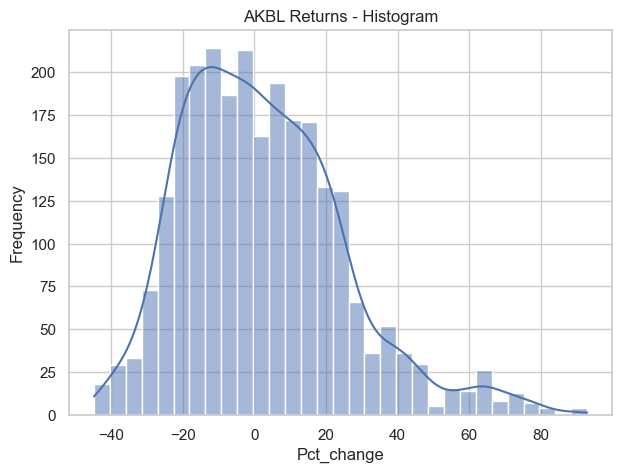

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
sns.histplot(returns['AKBL']*100,kde=True)
plt.title('AKBL Returns - Histogram')
plt.xlabel('Pct_change')
plt.ylabel('Frequency')
plt.show()

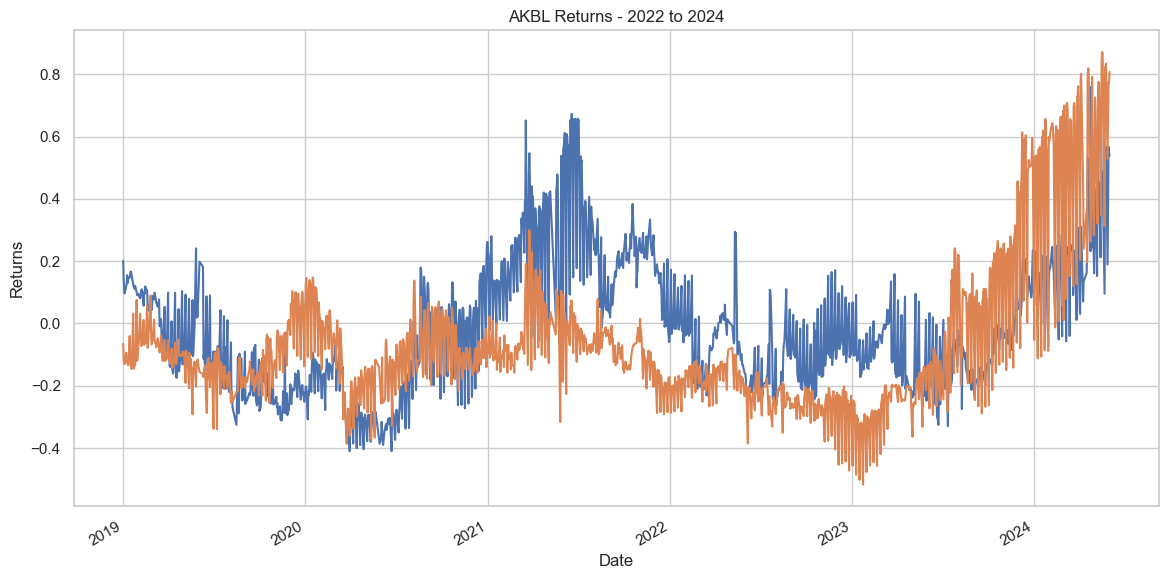

In [21]:
# Plot over time

plt.figure(figsize=(14,7))
returns.loc['2019':'2024']['AKBL'].plot()
returns.loc['2019':'2024']['MCB'].plot()

#plt.scatter(x=returns.index,y=returns['AKBL'])
#sns.barplot(x=returns.index,y=returns['AKBL'])
plt.title('AKBL Returns - 2022 to 2024')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [22]:
# Checking the range of the data
print('from  '+str(returns.index.min()))
print('to  '+str(returns.index.max()))

from  2014-01-01 00:00:00
to  2024-05-31 00:00:00


#### Metrics
- Pct_change for Returns
- Account for Dividens in Pct_change
- Multi-period and Annualized Returns
- Variance and Standard Deviation - Annualized
- Sharpe Ratio
- Max Drawdown
- Calmar Ratio
- Skewness, Kurtosis and Jarque-Beta
- VaR and CVaR

In [23]:
returns.std()

Name
ABL      0.248295
ABOT     0.418134
AGP      0.299068
AICL     0.333562
AKBL     0.226832
           ...   
TRG      1.942379
UBL      0.295450
UNITY    0.828731
UPFL     0.585411
YOUW     0.606442
Length: 100, dtype: float64

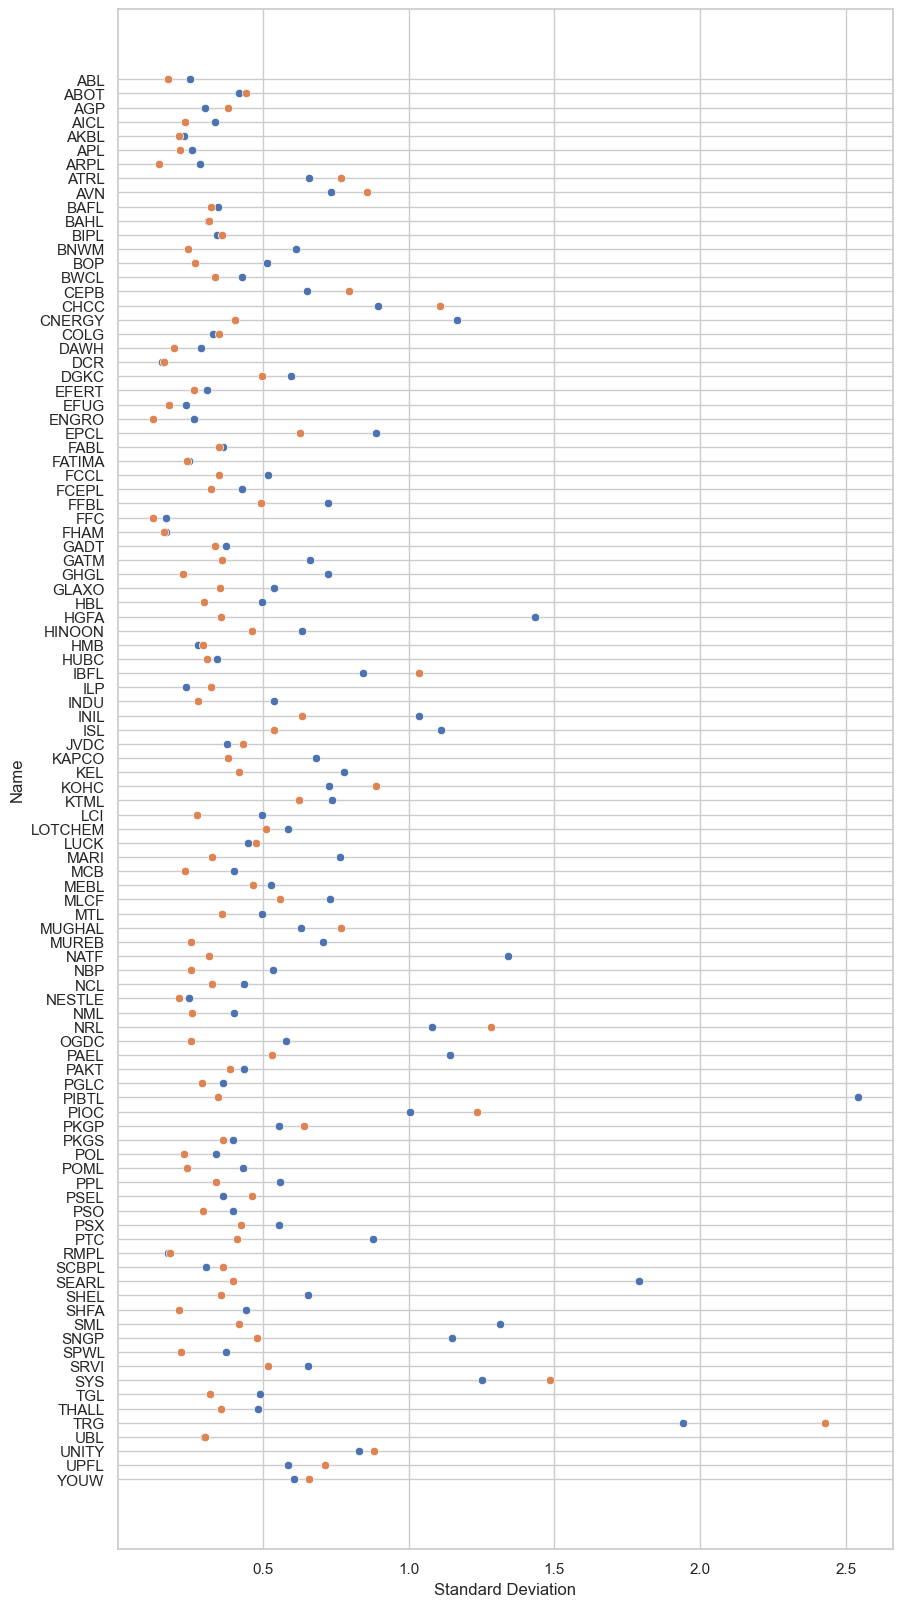

In [24]:
plt.figure(figsize=(10,20))
sns.scatterplot(y= returns.std().index,x=returns.std())
sns.scatterplot(y= returns['2019':'2024'].std().index,x=returns['2019':'2024'].std())
plt.xlabel('Standard Deviation')
plt.show()

In [25]:
# we check return per risk (this is not entirely accurate because std() is over all the years, 
# later we should set a period for better analysis e.g. annualised return and annualised risk)

returns_adj = returns/returns.std()


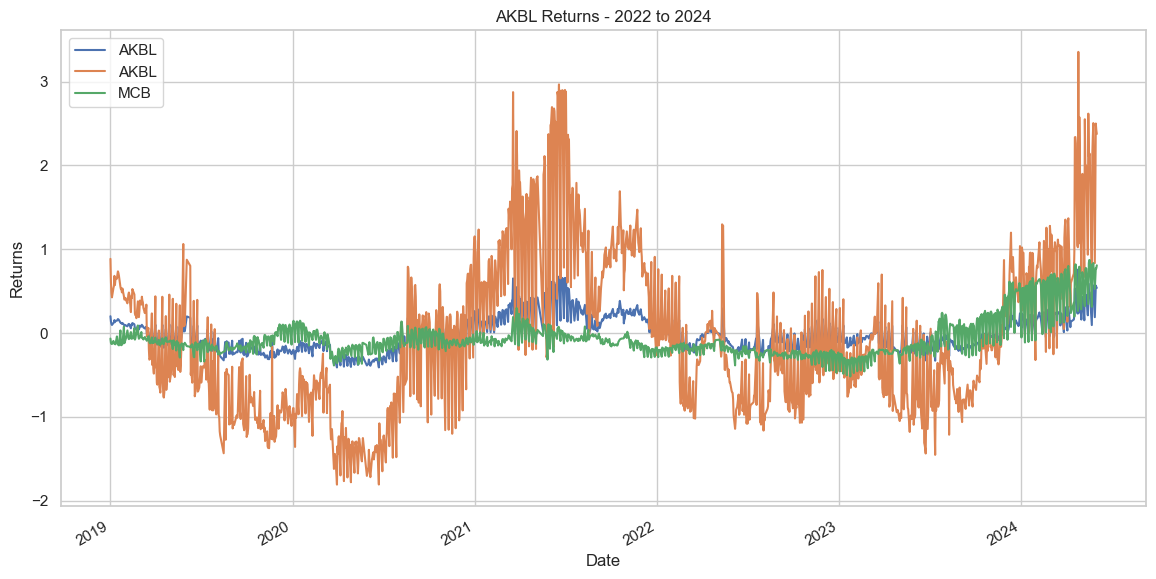

In [26]:
# Plot over time

plt.figure(figsize=(14,7))
returns.loc['2019':'2024']['AKBL'].plot()
returns_adj.loc['2019':'2024']['AKBL'].plot()
returns.loc['2019':'2024']['MCB'].plot()

#plt.scatter(x=returns.index,y=returns['AKBL'])
#sns.barplot(x=returns.index,y=returns['AKBL'])
plt.title('AKBL Returns - 2022 to 2024')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [27]:
# In the graph above, AKBL and AKBL adjusted have the same label, so we change the col names in the new df 

returns_adj.columns = returns_adj.columns + '_adj'
    

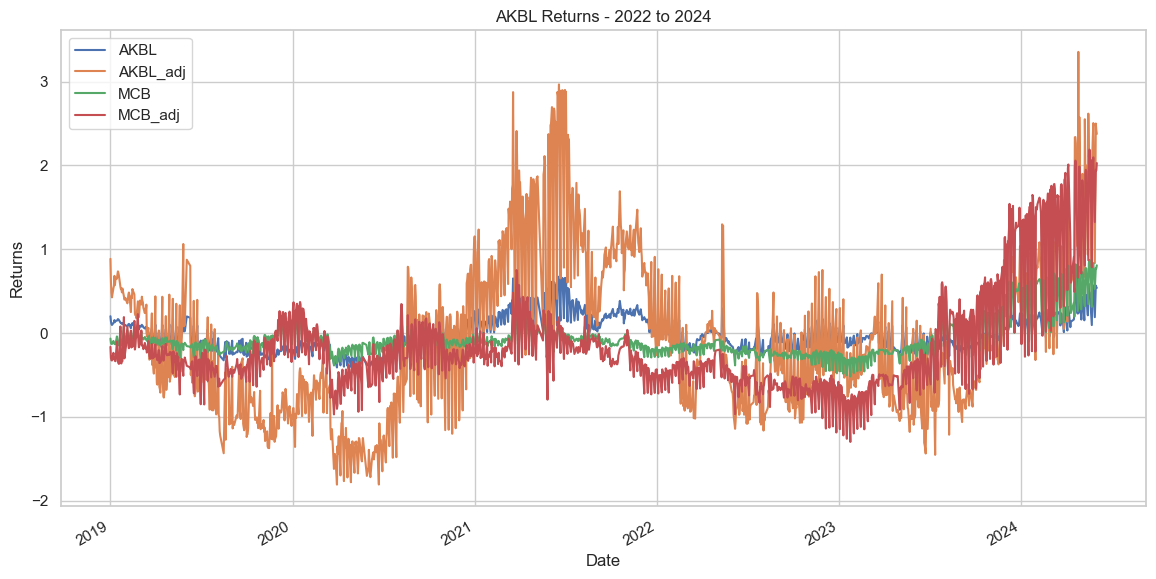

In [28]:
plt.figure(figsize=(14,7))
returns.loc['2019':'2024']['AKBL'].plot()
returns_adj.loc['2019':'2024']['AKBL_adj'].plot()
returns.loc['2019':'2024']['MCB'].plot()
returns_adj.loc['2019':'2024']['MCB_adj'].plot()

#plt.scatter(x=returns.index,y=returns['AKBL'])
#sns.barplot(x=returns.index,y=returns['AKBL'])
plt.title('AKBL Returns - 2022 to 2024')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Coursera 

## Contents
1. Compounding/Annualisation

## Compounding/Annualisation

In [29]:
returns.head()

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,0.261667,0.765651,NaN,0.315653,0.659757,0.057827,1.157983,-0.109051,NaN,0.259259,...,NaN,0.000000,NaN,0.891775,0.901173,0.613978,0.315540,NaN,NaN,-0.246795
2016-01-01,-0.159753,-0.093944,NaN,0.133794,-0.062877,-0.063904,-0.200187,0.150869,0.141293,-0.148657,...,-0.150327,0.000000,NaN,0.454753,-0.045702,1.342438,-0.109270,NaN,NaN,-0.361702
2018-01-01,0.000000,0.052000,NaN,-0.093603,-0.082261,0.052476,0.135341,0.101131,-0.121103,0.484416,...,-0.107692,0.497547,0.196172,0.360217,0.943284,-0.125142,0.219428,0.619818,NaN,0.383333
2019-01-01,0.125563,-0.080746,NaN,0.000000,0.200801,0.016101,-0.000533,-0.237477,1.290928,0.077916,...,-0.137586,0.000000,0.449333,-0.037637,-0.122536,-0.238947,-0.323108,0.684769,NaN,-0.293976


In [30]:
prices.head()

,Date,trading_open,trading_high,trading_low,trading_close,trading_vol,trading_change,Name
0,31-05-2024,99.90,99.90,98.1,98.54,5411,0.25,ABL
1,30-05-2024,99.20,99.20,98.0,98.29,47206,-1.11,ABL
2,29-05-2024,99.47,99.47,98.0,99.40,86683,0.89,ABL
3,27-05-2024,98.90,99.25,98.1,98.51,47538,-0.28,ABL
4,24-05-2024,98.00,99.50,98.0,98.79,53000,0.38,ABL


In [31]:
returns.loc['05-2024']

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-02,0.435879,0.403793,0.422691,0.654971,0.430789,0.249153,-0.196130,1.237893,-0.107735,1.049949,...,0.011693,1.537097,-0.156467,0.601572,0.971429,-0.452722,0.495018,0.914764,-0.063973,0.006116
2024-05-03,0.404345,0.413880,0.445272,0.638468,0.428851,0.255930,-0.213246,1.312574,-0.156796,0.972296,...,0.014485,1.455450,-0.133464,0.587680,0.960838,-0.437273,0.502553,0.921194,-0.124563,0.027439
2024-05-06,0.362449,-0.121460,-0.032628,0.142902,0.152295,0.219299,-0.416713,1.657223,-0.317905,0.713056,...,-0.049172,0.605065,0.021461,-0.105872,-0.045047,-0.228863,0.433731,0.044015,0.784993,-0.395147
2024-05-07,0.219827,0.405774,0.034796,0.094512,0.578571,0.449857,-0.295238,3.558670,1.155677,0.942612,...,0.154574,-0.059155,1.534761,0.643055,0.140456,2.242812,0.848625,1.035513,0.933333,0.147651
2024-05-08,0.459231,0.558254,0.642764,0.603563,0.457440,0.276798,-0.189048,1.285974,-0.123719,0.919323,...,0.007713,1.901673,-0.114701,0.473234,1.184190,-0.413773,0.517985,0.945174,-0.095451,0.056075
2024-05-09,0.476923,0.614885,0.773138,0.638173,0.454306,0.282215,-0.172146,1.306304,-0.063654,0.954291,...,0.016556,2.230733,-0.088775,0.531581,0.059929,-0.373788,0.492207,0.961120,-0.086191,0.093851
2024-05-10,0.484387,0.637484,0.814681,0.620721,0.451463,0.293808,-0.182524,1.302247,-0.052710,0.951683,...,0.012693,2.284726,-0.078106,0.521805,1.131713,-0.360397,0.645654,0.989748,-0.236400,0.177258
2024-05-13,0.289474,0.000346,0.134723,0.107364,0.212055,0.254896,-0.330296,1.605858,-0.212134,0.693015,...,0.048891,1.218581,0.134532,-0.089799,0.040528,-0.105729,0.486032,0.110817,1.109389,-0.312860
2024-05-14,0.367944,0.487996,-0.020578,0.108382,0.593750,0.416197,-0.284396,3.238936,1.171578,0.945455,...,0.152890,0.165129,1.605159,0.685101,0.293551,1.763463,0.931521,0.913242,1.087755,-0.078481
